# Visualización de datos

## **¿Qué hacen los gráficos?**
- Nos ayudan a tomar una decisión
- Explica conceptos
- La mayoría de los humanos no son naturalmente numéricos

#### **Matplotlib**

In [ ]:
!pip install matplotlib # si instalaron con conda usar !conda install matplotlib
!pip install seaborn
!pip install plotly

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Datos
x = np.linspace(0, 10, 100)
x

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

In [4]:
# Datos
x = np.linspace(0, 10, 100)
x

array([ 0.        ,  0.10083842,  0.20064886,  0.2984138 ,  0.39313661,
        0.48385164,  0.56963411,  0.64960951,  0.72296256,  0.78894546,
        0.84688556,  0.8961922 ,  0.93636273,  0.96698762,  0.98775469,
        0.99845223,  0.99897117,  0.98930624,  0.96955595,  0.93992165,
        0.90070545,  0.85230712,  0.79522006,  0.73002623,  0.65739025,
        0.57805259,  0.49282204,  0.40256749,  0.30820902,  0.21070855,
        0.11106004,  0.01027934, -0.09060615, -0.19056796, -0.28858706,
       -0.38366419, -0.47483011, -0.56115544, -0.64176014, -0.7158225 ,
       -0.7825875 , -0.84137452, -0.89158426, -0.93270486, -0.96431712,
       -0.98609877, -0.99782778, -0.99938456, -0.99075324, -0.97202182,
       -0.94338126, -0.90512352, -0.85763861, -0.80141062, -0.73701276,
       -0.66510151, -0.58640998, -0.50174037, -0.41195583, -0.31797166,
       -0.22074597, -0.12126992, -0.0205576 ,  0.0803643 ,  0.18046693,
        0.27872982,  0.37415123,  0.46575841,  0.55261747,  0.63

In [5]:
import pandas as pd

df = pd.DataFrame({"x": x, "y": y})
df

,x,y
0,0.00000,0.000000
1,0.10101,0.100838
2,0.20202,0.200649
3,0.30303,0.298414
4,0.40404,0.393137
...,...,...
95,9.59596,-0.170347
96,9.69697,-0.268843
97,9.79798,-0.364599
98,9.89899,-0.456637


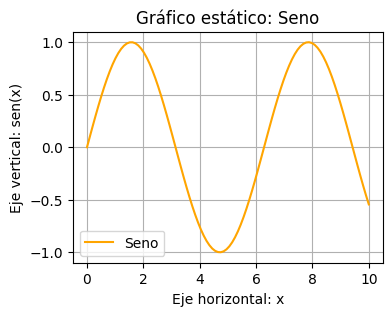

In [19]:
plt.figure(figsize=(4,3))
plt.plot(x, y, label="Seno", color="orange")
plt.title("Gráfico estático: Seno")
plt.xlabel("Eje horizontal: x")
plt.ylabel("Eje vertical: sen(x)")
plt.legend()
plt.grid(True)
plt.show()

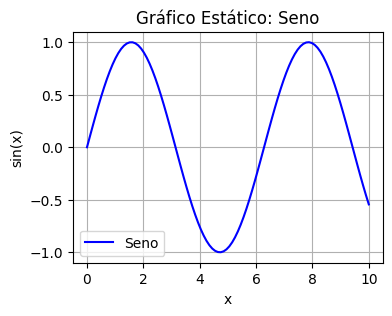

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Datos
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Crear gráfico
plt.figure(figsize=(4, 3))
plt.plot(x, y, label='Seno', color='blue')
plt.title('Gráfico Estático: Seno')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.legend()
plt.grid(True)
plt.show()

#### **Seaborn**

In [22]:
import seaborn as sns
import pandas as pd

In [23]:
# Datos simulados
data = np.random.normal(size=10000)
data

array([-0.29050945, -0.36661358,  0.29230718, ...,  0.15058238,
       -0.96307659,  0.76119121])

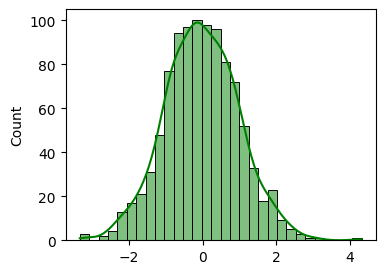

In [28]:
plt.figure(figsize=(4,3))
sns.histplot(data, bins=30, color="green", kde=True)
plt.show()

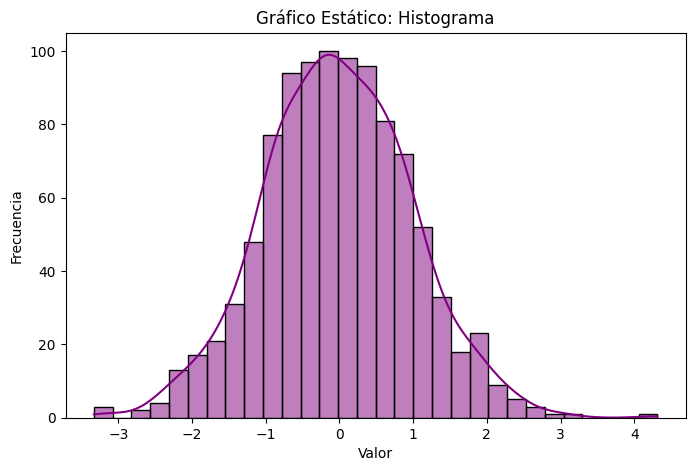

In [27]:
import seaborn as sns
import pandas as pd

# Datos simulados
data = np.random.normal(size=1000)

# Crear gráfico
plt.figure(figsize=(8, 5))
sns.histplot(data, bins=30, kde=True, color='purple')
plt.title('Gráfico Estático: Histograma')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

#### **Plotly**

In [ ]:
!pip install plotly

In [29]:
import plotly.express as px
import pandas as pd

In [39]:
# Datos simulados
df = pd.DataFrame({
    'x': np.random.rand(100),
    'y': np.random.rand(100),
    'size': np.random.rand(100) * 50,
    'color': np.random.choice(['A', 'B', 'C'], 100)
})

df

,x,y,size,color
0,0.028685,0.904626,6.397040,B
1,0.470299,0.742524,22.276496,A
2,0.545990,0.188338,39.128000,C
3,0.550386,0.179513,11.761712,B
4,0.753845,0.153975,39.504631,B
...,...,...,...,...
95,0.908648,0.130119,2.308067,A
96,0.372989,0.588277,30.584573,B
97,0.586408,0.537341,17.617849,B
98,0.471536,0.887714,23.934639,C


In [45]:
fig = px.scatter(
    df,
    x="x", 
    y="y", 
    size="size", 
    color="color",
    labels={"x":"Eje X", "y": "Eje Y"},
    title="Gráfico interactivo: X vs Y",
    template="plotly_dark")

fig.update_layout(width=600,height=500)
fig.show()

In [46]:
import plotly.express as px
import pandas as pd

# Datos simulados
df = pd.DataFrame({
    'x': np.random.rand(100),
    'y': np.random.rand(100),
    'size': np.random.rand(100) * 50,
    'color': np.random.choice(['A', 'B', 'C'], 100)
})

# Crear gráfico interactivo
fig = px.scatter(
    df, x='x', y='y', size='size', color='color',
    title='Gráfico Interactivo: Dispersión',
    labels={'x': 'Eje X', 'y': 'Eje Y'},
    template='plotly_dark'
)

fig.update_layout(width=800, height=500)
fig.show()

In [48]:
# Datos
data = pd.DataFrame({
    'Categoría': ['A', 'B', 'C', 'D', 'E'],
    'Valor': [10, 15, 7, 12, 9]
})

# Crear gráfico interactivo con ajustes de tamaño
fig = px.bar(
    data, x='Categoría', y='Valor',
    title='Gráfico Interactivo: Barras',
    labels={'Valor': 'Frecuencia', 'Categoría': 'Categorías'},
    template='ggplot2'
)

# Ajustar tamaño
fig.update_layout(width=600, height=500)
fig.show()


### **Vamos a la cancha**

> [*"El Perú es uno de los países menos honestos, según estudio internacional"*](https://elcomercio.pe/economia/peru/investigadores-pierden-17-000-carteras-mundo-son-devueltas-noticia-647885-noticia/)

Data: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/YKBODN

Un estudio realizado por el equipo de investigadores, de universidades de Zurich, Michigan y Utah publicado en la revista Science, puso a prueba el civismo de miles de personas a las que confiaron billeteras "perdidas". El experimento consistió en "perder" 17.000 carteras (en 355 ciudades) y decir a un empleado del local haber encontrado la cartera en el suelo y que por motivos de tiempo, les pedían ocuparse del asunto.

La honestidad ha sido muy estudiada por psicólogos y economistas, pero poco en la vida real y jamás, en 40 países a la vez. Los resultados muestran marcadas diferencias entre los países participantes: con Suiza y los países escandinavos entre los más honestos del listado, mientras que el que Perú, Marruecos y China, se encuentran en los últimos tres lugares.

<img src="https://www.science.org/cms/10.1126/science.aau8712/asset/c1097eeb-12c3-41cb-98f7-26f4ab47ebeb/assets/graphic/365_70_f1.jpeg" width="600">

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar datos
civic_raw = pd.read_csv("data/civic_data.csv")
civic_raw

,id,country,Country,city,institution,cond,day,response,responsetime,age,...,c_AG_pprotest,c_WVS_familyties,c_DEEP_adjstatehist,c_PIV_years_democracy,c_PIV_exconst,c_GPLS_judicial_independence,c_GPLS_constitutional_review,c_GPLS_plurality,c_GPLS_prop_representation,c_HIST_prim_educ_1920
0,24970,38,UAE,267,2,0,18nov2015,0,NaN,5.0,...,0.3,NaN,NaN,0,3.0,NaN,NaN,NaN,NaN,NaN
1,24887,38,UAE,240,5,0,12nov2015,0,NaN,4.0,...,0.3,NaN,NaN,0,3.0,NaN,NaN,NaN,NaN,NaN
2,24981,38,UAE,267,2,1,21nov2015,0,NaN,3.0,...,0.3,NaN,NaN,0,3.0,NaN,NaN,NaN,NaN,NaN
3,24881,38,UAE,240,4,0,12nov2015,0,NaN,2.0,...,0.3,NaN,NaN,0,3.0,NaN,NaN,NaN,NaN,NaN
4,25093,38,UAE,327,3,1,10nov2015,0,NaN,3.0,...,0.3,NaN,NaN,0,3.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17298,22450,32,South Africa,258,4,1,13jan2016,100,0.186933,4.0,...,39.0,0.321623,0.271701,105,7.0,1.0,0.67,0.0,1.0,31.6
17299,22643,32,South Africa,320,2,1,28jan2016,0,NaN,3.0,...,39.0,0.321623,0.271701,105,7.0,1.0,0.67,0.0,1.0,31.6
17300,22675,32,South Africa,322,2,0,19jan2016,0,NaN,5.0,...,39.0,0.321623,0.271701,105,7.0,1.0,0.67,0.0,1.0,31.6
17301,22581,32,South Africa,284,2,1,07feb2016,0,NaN,3.0,...,39.0,0.321623,0.271701,105,7.0,1.0,0.67,0.0,1.0,31.6


In [55]:
civic_raw["Country"].nunique()

40

In [53]:
civic_raw.groupby("Country")["response"].mean().sort_values(ascending=True)

Country
Peru              13.750000
China             14.250000
Kenya             17.153285
Kazakhstan        17.500000
Morocco           17.661692
Malaysia          19.250000
Ghana             19.732441
Mexico            21.000000
Indonesia         25.000000
UAE               25.500000
Turkey            30.750000
Thailand          32.000000
India             33.000000
South Africa      33.834586
Chile             36.111111
Brazil            41.353383
Italy             41.750000
Portugal          42.500000
Greece            45.250000
Israel            46.666667
Argentina         47.500000
USA               52.800000
Russia            53.973510
Spain             54.000000
Serbia            54.666667
Romania           54.750000
Canada            55.000000
France            55.985037
UK                56.625442
Croatia           59.333333
Germany           60.000000
Australia         60.651629
Poland            67.750000
Czech Republic    70.000000
New Zealand       70.750000
Netherlands 

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar datos
civic_raw = pd.read_csv("data/civic_data.csv")

# Previsualizar las columnas relevantes
civic_raw[["country", "Country", "cond", "age", "response", "male", "computer"]].head()


,country,Country,cond,age,response,male,computer
0,38,UAE,0,5.0,0,1.0,1.0
1,38,UAE,0,4.0,0,1.0,1.0
2,38,UAE,1,3.0,0,1.0,1.0
3,38,UAE,0,2.0,0,0.0,1.0
4,38,UAE,1,3.0,0,0.0,1.0


In [66]:
# Filtrar y agrupar los datos según las condiciones
civic = (civic_raw[civic_raw['cond'].isin([0, 1])]
         .groupby(['Country', 'cond'], as_index=False)
         .agg(reported=('response', 'mean')))

# Ver los datos procesados
civic.head()


,Country,cond,reported
0,Argentina,0,46.000000
1,Argentina,1,49.000000
2,Australia,0,52.261307
3,Australia,1,69.000000
4,Brazil,0,34.000000


In [67]:
# Filtrar para el gráfico (cond == 1) y gráfico básico
civic_cond_1 = civic[civic['cond'] == 1]
civic_cond_1

,Country,cond,reported
1,Argentina,1,49.000000
3,Australia,1,69.000000
5,Brazil,1,48.743719
7,Canada,1,63.500000
9,Chile,1,36.868687
11,China,1,21.500000
13,Croatia,1,66.666667
15,Czech Republic,1,78.000000
17,Denmark,1,82.000000
19,France,1,58.354115


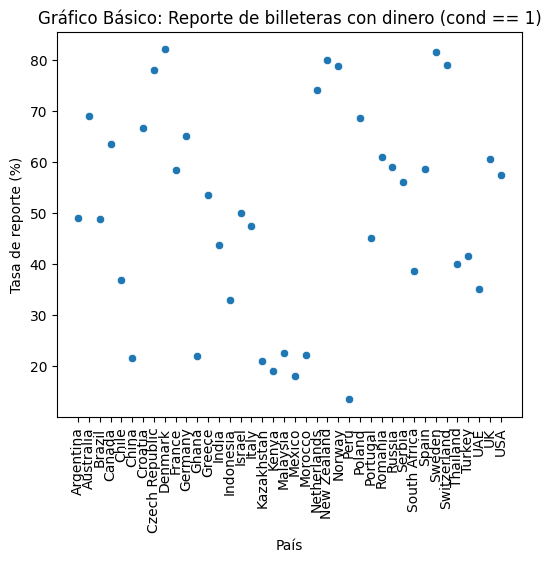

In [70]:
# Filtrar para el gráfico (cond == 1) y gráfico básico
civic_cond_1 = civic[civic['cond'] == 1]

# Gráfico básico
plt.figure(figsize=(6, 5))
sns.scatterplot(data=civic_cond_1, x='Country', y='reported')
plt.title('Gráfico Básico: Reporte de billeteras con dinero (cond == 1)')
plt.xlabel('País')
plt.ylabel('Tasa de reporte (%)')
plt.xticks(rotation=90)
plt.show()


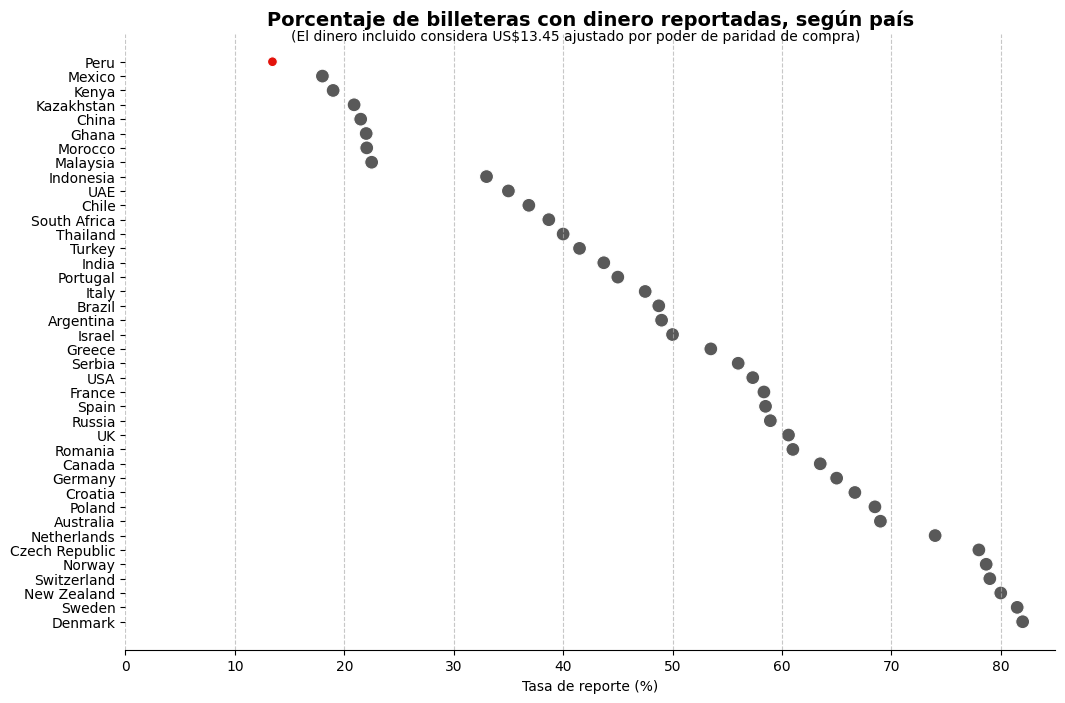

In [72]:
# Gráfico sofisticado
plt.figure(figsize=(12, 8))
sorted_data = civic_cond_1.sort_values(by='reported', ascending=True)

sns.scatterplot(
    data=sorted_data,
    x='reported',
    y=pd.Categorical(sorted_data['Country'], categories=sorted_data['Country']),
    hue=sorted_data['Country'] != 'Peru',
    size=sorted_data['Country'] != 'Peru',
    sizes=(100, 50),
    palette={True: "#595959", False: "#E3120B"}
)

# # Añadir etiquetas al lado de los puntos
# for index, row in sorted_data.iterrows():
#     plt.text(row['reported'] + 1, row['Country'], row['Country'],
#              color="#E3120B" if row['Country'] == 'Peru' else "#595959",
#              fontsize=8, va='center')

# Ajustes finales
plt.title("Porcentaje de billeteras con dinero reportadas, según país", fontsize=14, weight='bold')
plt.suptitle("(El dinero incluido considera US$13.45 ajustado por poder de paridad de compra)", fontsize=10, y=0.885)
plt.xlabel("Tasa de reporte (%)")
plt.ylabel(None)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xlim(0, 85)
plt.xticks(range(0, 90, 10))
plt.legend([], [], frameon=False)  # Ocultar leyenda
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()
